In [1]:
import pandas as pd
import numpy as np


In [2]:
import os
os.chdir('../')

In [3]:
pwd

'e:\\project'

In [4]:
df=pd.read_csv('data\clean-data.csv')
df.head()

,Unnamed: 0,age,workclass,education,matrial,occupation,relationship,race,sex,work-per-week,country,salary
0,0,50,5,9,2,3,0,4,1,13,38,0
1,1,38,3,11,0,5,5,4,1,40,38,0
2,2,53,3,1,2,5,0,2,1,40,38,0
3,3,28,3,9,2,9,3,2,0,40,4,0
4,4,37,3,12,2,3,3,4,0,40,38,0


In [5]:
df.isna().sum()

Unnamed: 0       0
age              0
workclass        0
education        0
matrial          0
occupation       0
relationship     0
race             0
sex              0
work-per-week    0
country          0
salary           0
dtype: int64

In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,age,workclass,education,matrial,occupation,relationship,race,sex,work-per-week,country,salary
0,50,5,9,2,3,0,4,1,13,38,0
1,38,3,11,0,5,5,4,1,40,38,0
2,53,3,1,2,5,0,2,1,40,38,0
3,28,3,9,2,9,3,2,0,40,4,0
4,37,3,12,2,3,3,4,0,40,38,0


In [7]:
x_res=df.select_dtypes(include='object')
x_res

""
0
1
2
3
4
...
49433
49434
49435
49436


In [8]:
df.isnull().sum()

age              0
workclass        0
education        0
matrial          0
occupation       0
relationship     0
race             0
sex              0
work-per-week    0
country          0
salary           0
dtype: int64

# Convert categorical variables to numerical 

In [9]:
from sklearn.preprocessing import RobustScaler,OneHotEncoder,LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [10]:
for i,col in enumerate(x_res):
	le=LabelEncoder()

	df[col]=le.fit_transform(x_res[col])

In [11]:
df

,age,workclass,education,matrial,occupation,relationship,race,sex,work-per-week,country,salary
0,50,5,9,2,3,0,4,1,13,38,0
1,38,3,11,0,5,5,4,1,40,38,0
2,53,3,1,2,5,0,2,1,40,38,0
3,28,3,9,2,9,3,2,0,40,4,0
4,37,3,12,2,3,3,4,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...
49433,43,3,9,4,9,5,4,1,45,38,1
49434,44,4,15,2,3,0,4,1,50,38,1
49435,40,1,11,2,9,3,4,0,40,38,1
49436,40,4,8,2,3,0,4,1,40,38,1


In [12]:
df.isna().sum()

age              0
workclass        0
education        0
matrial          0
occupation       0
relationship     0
race             0
sex              0
work-per-week    0
country          0
salary           0
dtype: int64

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

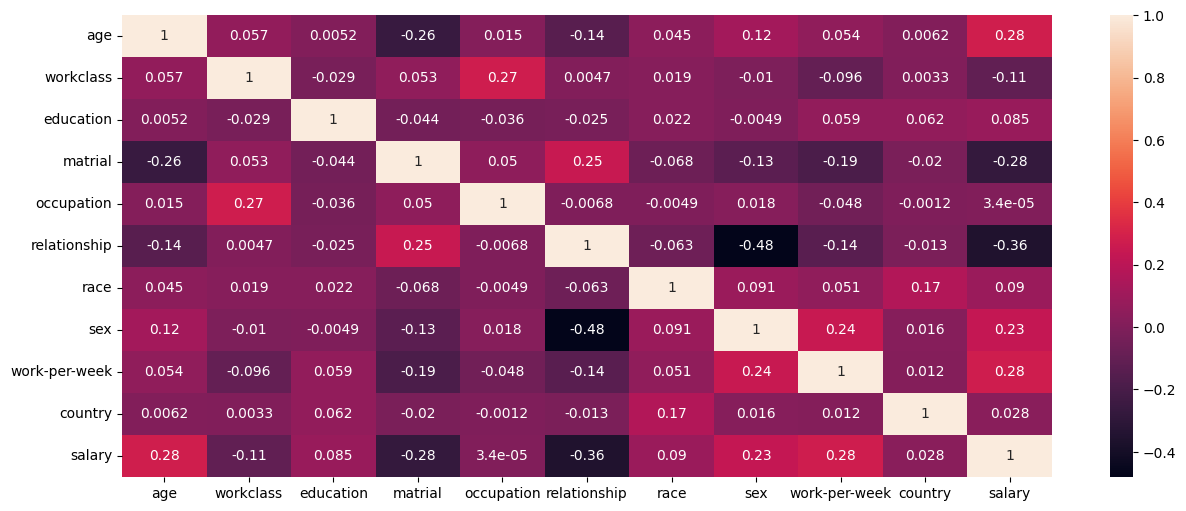

In [14]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)

# Outliers handling

<Axes: >

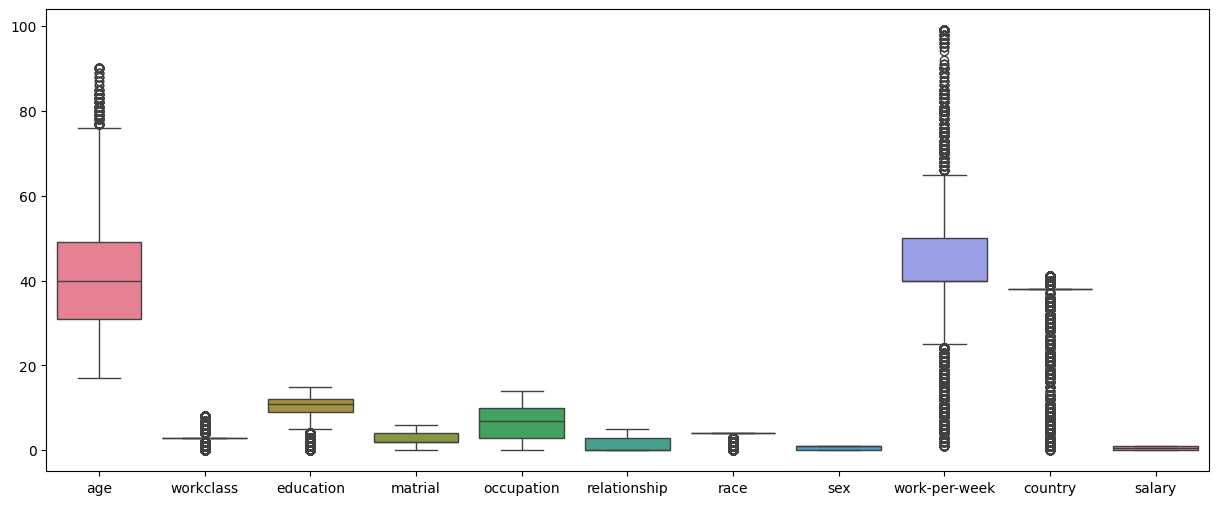

In [15]:
plt.figure(figsize=(15,6))
sns.boxplot(df)

In [16]:
df_copy=df.copy()
df_copy.shape

(49438, 11)

In [17]:
def remove_outliers(col):
    Q1=df_copy[col].quantile(0.25)
    Q3=df_copy[col].quantile(0.75)
    IQR=Q3-Q1
    upper_fence=Q3+1.5*(IQR)
    lower_fence=Q1- 1.5*(IQR)
    df_copy.loc[(df[col]>upper_fence),col]
    df_copy.loc[(df[col]<lower_fence),col]
    return df_copy

In [18]:
for col in df_copy.columns:
    remove_outliers(col)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'age'),
  Text(1, 0, 'workclass'),
  Text(2, 0, 'education'),
  Text(3, 0, 'matrial'),
  Text(4, 0, 'occupation'),
  Text(5, 0, 'relationship'),
  Text(6, 0, 'race'),
  Text(7, 0, 'sex'),
  Text(8, 0, 'work-per-week'),
  Text(9, 0, 'country'),
  Text(10, 0, 'salary')])

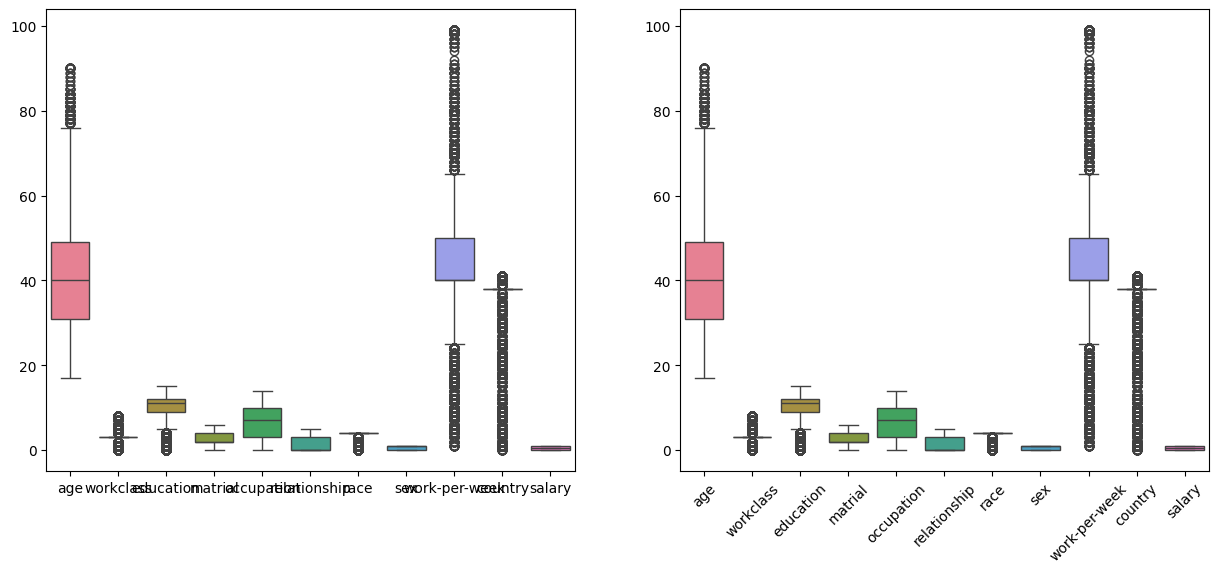

In [19]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(df)
plt.subplot(1,2,2)
sns.boxplot(df_copy)
plt.xticks(rotation=45)

In [20]:
def remove_outliers(df, threshold=3):

   
    z_scores = np.abs((df - df.mean()) / df.std())
    
   
    filtered_df = df[(z_scores < threshold).all(axis=1)]
    
    return filtered_df

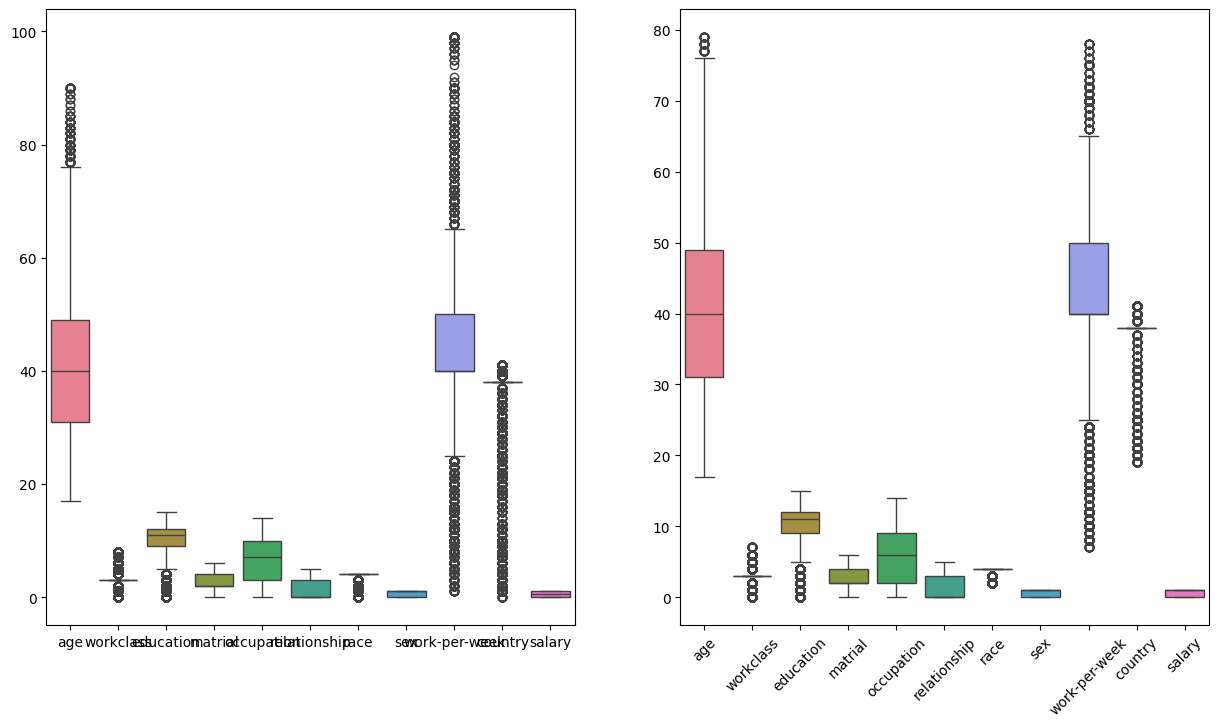

In [21]:
df_copy = remove_outliers(df_copy)
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.boxplot(df)
plt.subplot(1,2,2)
sns.boxplot(df_copy)
plt.xticks(rotation=45)
plt.show()

In [22]:
df_copy.head()

,age,workclass,education,matrial,occupation,relationship,race,sex,work-per-week,country,salary
0,50,5,9,2,3,0,4,1,13,38,0
1,38,3,11,0,5,5,4,1,40,38,0
2,53,3,1,2,5,0,2,1,40,38,0
4,37,3,12,2,3,3,4,0,40,38,0
5,49,3,6,3,7,5,2,0,16,22,0


In [23]:
df_copy.isna().sum()

age              0
workclass        0
education        0
matrial          0
occupation       0
relationship     0
race             0
sex              0
work-per-week    0
country          0
salary           0
dtype: int64

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [25]:
def split_data(x,y):
   x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.29,random_state=42)
   sc=StandardScaler()
   x_train=sc.fit_transform(x_train)
   x_test=sc.transform(x_test)
   return x_train,x_test,y_train,y_test

In [26]:
x=df_copy.iloc[:,:-1]
y=df_copy['salary']

In [27]:
x_train,x_test,y_train,y_test=split_data(x,y)

In [28]:
x_train.shape

(30866, 10)

In [29]:
y_train

41453    1
19999    0
17644    0
27670    0
35169    1
        ..
7286     1
13085    0
43596    1
991      0
18283    1
Name: salary, Length: 30866, dtype: int64

<Axes: xlabel='salary'>

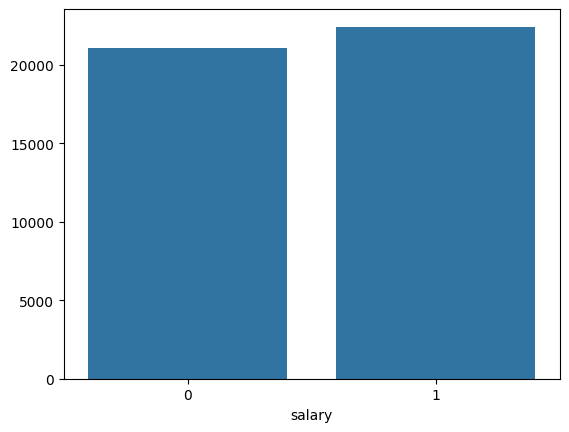

In [30]:
sns.barplot(x=df_copy['salary'].value_counts().index, y=df_copy['salary'].value_counts().values)

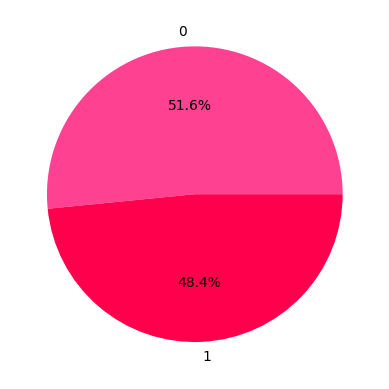

In [31]:
plt.pie(df_copy['salary'].value_counts(),autopct='%1.1f%%',colors=['#FF4191','#FF004D'],labels=df_copy['salary'].unique())
plt.show()

## obesrvation
target varible totaly imblnce data

In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [90]:
def model_evaluatuion(x_train,y_train,x_test,y_test,models):

        
            report={}
            for i in range(len(models)):
                model = list(models.values())[i]
               
                print(f"Training {model}...")

                # Train model
                model.fit(x_train,y_train)

                # Predict Testing data
                y_test_pred =model.predict(x_test)

                
                test_model_score = accuracy_score(y_test,y_test_pred)*100
                cof=confusion_matrix(y_test,y_test_pred)

                report[list(models.keys())[i]] = f' test score {test_model_score}  cof {print(cof)}'


            return report

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from xgboost import XGBClassifier

In [88]:
models={
                'LogisticRegression':LogisticRegression(),
                'KNeighborsClassifier': KNeighborsClassifier(),
                'DesisionTree':DecisionTreeClassifier(),
                'RandomForest':RandomForestClassifier(),
                'BaggingClf':BaggingClassifier(),
                'Xgboost':XGBClassifier()
            }

In [91]:
report=model_evaluatuion(x_train,y_train,x_test,y_test,models)

Training LogisticRegression()...
[[4499 1990]
 [1432 5083]]
Training KNeighborsClassifier()...
[[5089 1400]
 [ 826 5689]]
Training DecisionTreeClassifier()...
[[5173 1316]
 [ 976 5539]]
Training RandomForestClassifier()...
[[5389 1100]
 [ 690 5825]]
Training BaggingClassifier()...
[[5375 1114]
 [ 848 5667]]
Training XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None,

In [94]:
best_model_score=max(sorted(report.values()))
best_model_score

' test score 86.23500461396493  cof None'

In [96]:
best_model_name = list(report.keys())[
                list(report.values()).index(best_model_score)
            ]
best_model_name

'RandomForest'

In [99]:
best_model = models[best_model_name]
best_model

RandomForestClassifier()

## Smote

In [37]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [38]:
from imblearn.over_sampling import SMOTE

In [39]:
sm=SMOTE(random_state=42)
x_re,y_re=sm.fit_resample(x,y)

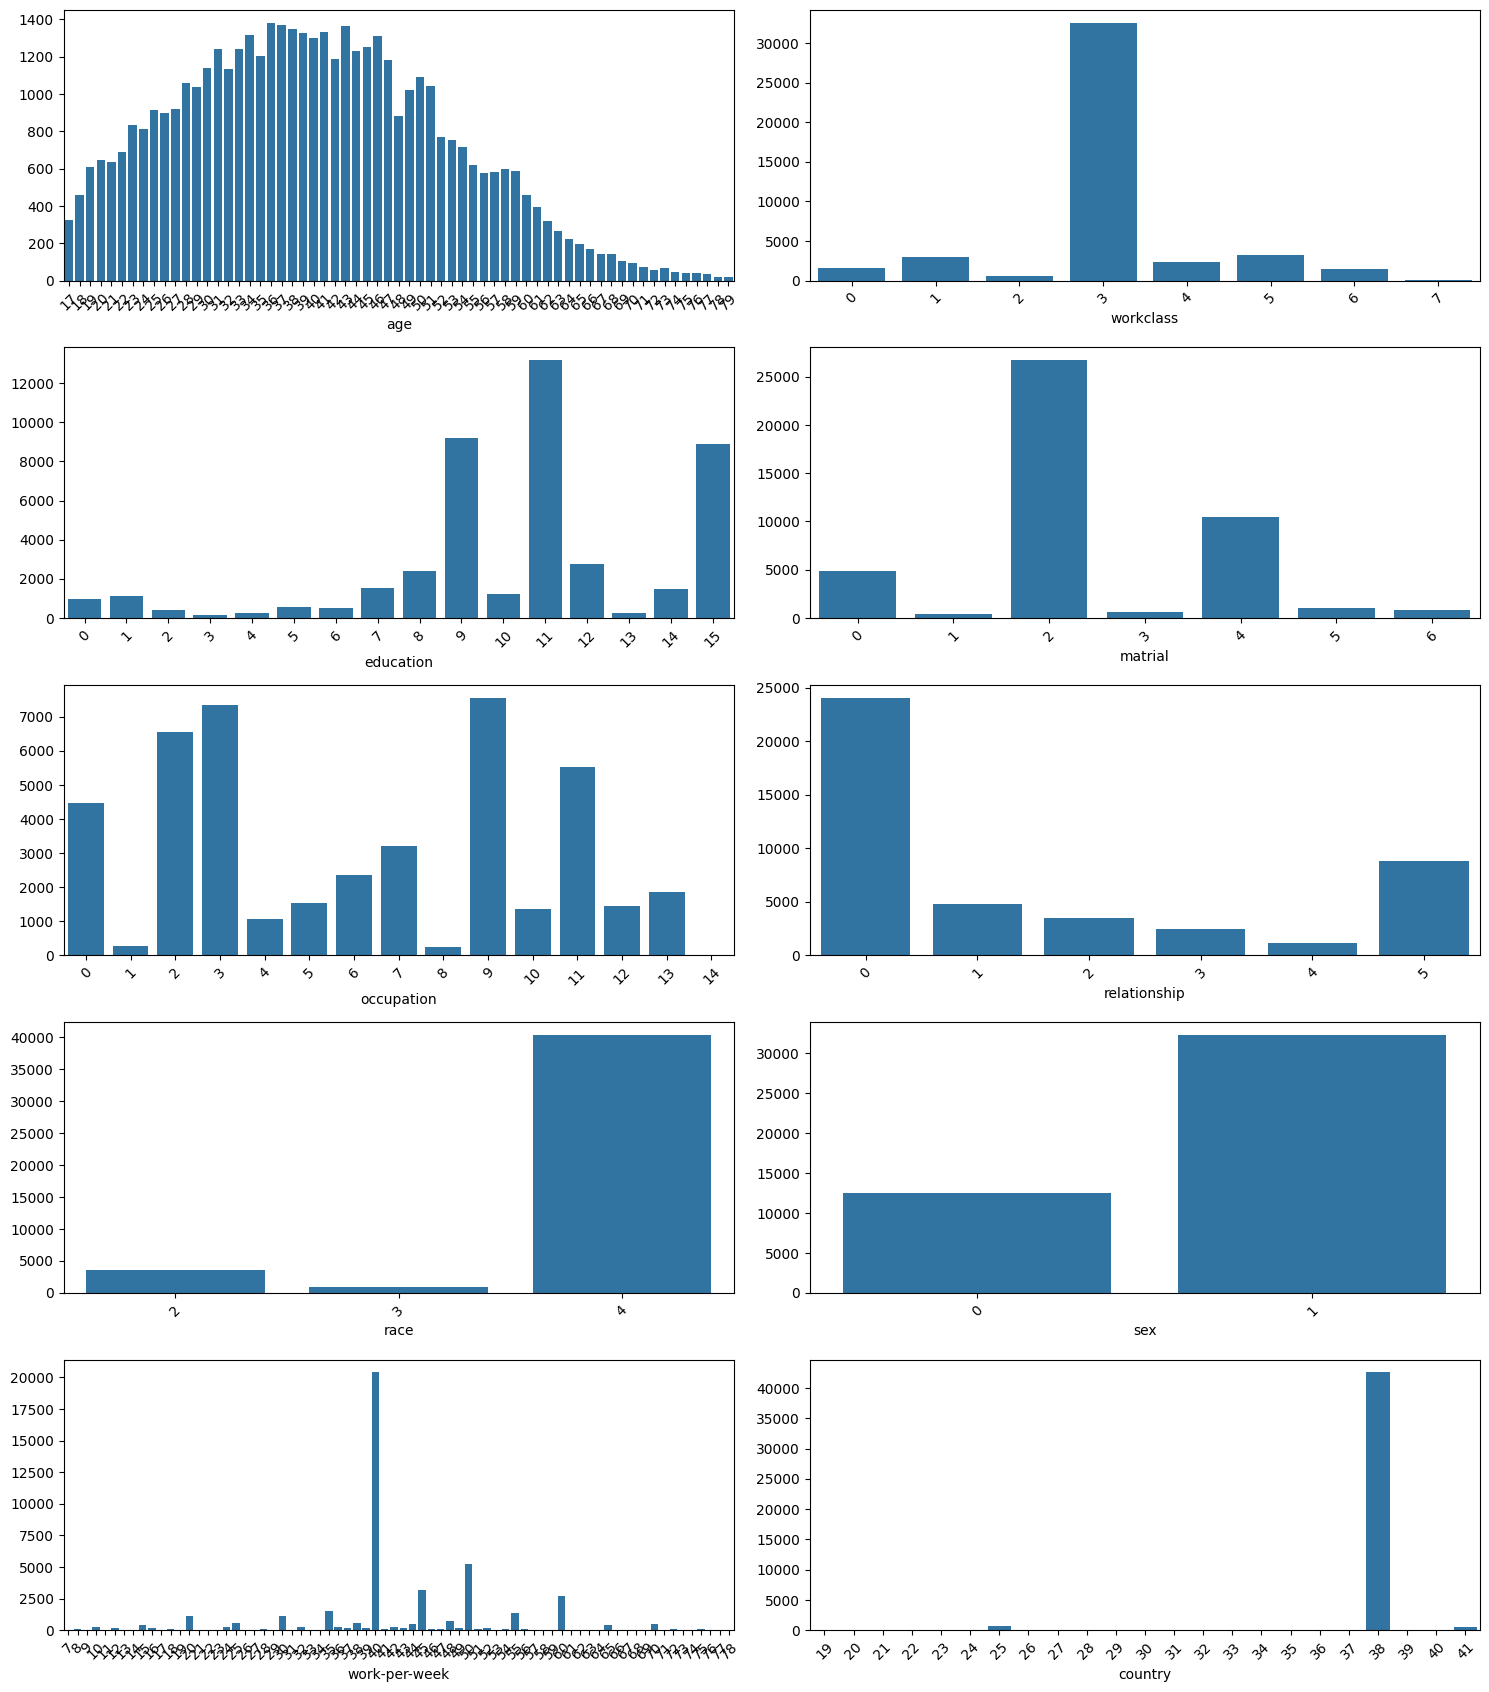

In [40]:
plt.figure(figsize=(15,30))
for i,col in enumerate(x_re):
    plt.subplot(9,2,i+1)
    sns.barplot(x=x_re[col].value_counts().index, y=x_re[col].value_counts().values)
    plt.xticks(rotation=45)
   
plt.tight_layout()
plt.show()

In [41]:
y_re.value_counts()

salary
0    22420
1    22420
Name: count, dtype: int64

In [42]:
x_re.shape

(44840, 10)

In [43]:
x_train,x_test,y_train,y_test=split_data(x_re,y_re)

In [44]:
y_train

4108     0
17846    0
11405    1
40064    1
12903    1
        ..
11284    0
44732    0
38158    1
860      0
15795    1
Name: salary, Length: 31836, dtype: int64

In [45]:
model_evaluatuion(x_train,y_train,x_test,y_test,models)

Training LogisticRegression()...
[[4499 1990]
 [1432 5083]]
Training KNeighborsClassifier()...
[[5089 1400]
 [ 826 5689]]
Training DecisionTreeClassifier()...
[[5174 1315]
 [ 971 5544]]
Training RandomForestClassifier()...
[[5396 1093]
 [ 692 5823]]
Training BaggingClassifier()...
[[5394 1095]
 [ 887 5628]]
Training XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None,

{'LogisticRegression': ' test score 73.68501999384804  cof None',
 'KNeighborsClassifier': ' test score 82.88219009535528  cof None',
 'DesisionTree': ' test score 82.42079360196863  cof None',
 'RandomForest': ' test score 86.27345432174715  cof None',
 'BaggingClf': ' test score 84.75853583512766  cof None',
 'Xgboost': ' test score 84.9584743155952  cof None'}

# Ensmble Technique

In [46]:
from sklearn.svm import SVC

In [107]:
models=[
    ('LogisticRegression',LogisticRegression()),
    ('DecisionTreeClassifier',DecisionTreeClassifier()),
    ('XGBClassifier',XGBClassifier()),
    ('KNeighborsClassifier',KNeighborsClassifier()),
    ('RandomForestClassifier',RandomForestClassifier())
]

In [108]:
def model_evaluatuion(x_train, y_train, x_test, y_test, models):

  
    report = {}
    for name, clf in models:
        
    
        model=BaggingClassifier(estimator=clf,n_estimators=50,random_state=45,verbose=3)

            # Train model
        model.fit(x_train, y_train)

            # Predict Testing data
        y_test_pred = model.predict(x_test)

        test_model_score = accuracy_score(y_test, y_test_pred)*100

        report[name] = test_model_score

    return report


In [109]:
x_re.isnull().sum()

age              0
workclass        0
education        0
matrial          0
occupation       0
relationship     0
race             0
sex              0
work-per-week    0
country          0
salary           0
dtype: int64

In [51]:
x_re['salary']=y_re

In [52]:
x_re

,age,workclass,education,matrial,occupation,relationship,race,sex,work-per-week,country,salary
0,50,5,9,2,3,0,4,1,13,38,0
1,38,3,11,0,5,5,4,1,40,38,0
2,53,3,1,2,5,0,2,1,40,38,0
3,37,3,12,2,3,3,4,0,40,38,0
4,49,3,6,3,7,5,2,0,16,22,0
...,...,...,...,...,...,...,...,...,...,...,...
44835,21,3,15,4,10,1,4,0,47,38,0
44836,20,3,15,4,7,1,4,0,16,38,0
44837,41,4,11,2,3,0,4,1,43,25,0
44838,26,3,3,4,6,5,3,1,74,25,0


In [53]:
x_re.shape

(44840, 11)

In [54]:
x_re.isna().sum()

age              0
workclass        0
education        0
matrial          0
occupation       0
relationship     0
race             0
sex              0
work-per-week    0
country          0
salary           0
dtype: int64

In [55]:
x_re.to_csv('data/clean-data.csv')

In [110]:
x=x_re.drop('salary',axis=1)
y=x_re['salary']

In [111]:
x_train,x_test,y_train,y_test=split_data(x,y)

In [112]:
report=model_evaluatuion(x_train, y_train, x_test, y_test, models)

Building estimator 1 of 50 for this parallel run (total 50)...
Building estimator 2 of 50 for this parallel run (total 50)...
Building estimator 3 of 50 for this parallel run (total 50)...
Building estimator 4 of 50 for this parallel run (total 50)...
Building estimator 5 of 50 for this parallel run (total 50)...
Building estimator 6 of 50 for this parallel run (total 50)...
Building estimator 7 of 50 for this parallel run (total 50)...
Building estimator 8 of 50 for this parallel run (total 50)...
Building estimator 9 of 50 for this parallel run (total 50)...
Building estimator 10 of 50 for this parallel run (total 50)...
Building estimator 11 of 50 for this parallel run (total 50)...
Building estimator 12 of 50 for this parallel run (total 50)...
Building estimator 13 of 50 for this parallel run (total 50)...
Building estimator 14 of 50 for this parallel run (total 50)...
Building estimator 15 of 50 for this parallel run (total 50)...
Building estimator 16 of 50 for this parallel run

In [113]:
print(report)

{'LogisticRegression': 73.68501999384804, 'DecisionTreeClassifier': 85.4275607505383, 'XGBClassifier': 85.0968932636112, 'KNeighborsClassifier': 83.25899723162104, 'RandomForestClassifier': 86.2119347892956}


In [114]:
best_model_score=max(sorted(report.values()))
best_model_score

86.2119347892956

In [115]:
report.keys()

dict_keys(['LogisticRegression', 'DecisionTreeClassifier', 'XGBClassifier', 'KNeighborsClassifier', 'RandomForestClassifier'])

In [128]:
list(report.values())

[73.68501999384804,
 85.4275607505383,
 85.0968932636112,
 83.25899723162104,
 86.2119347892956]

In [123]:
list(report.values()).index(best_model_score)

4

In [127]:
list(report.keys())

['LogisticRegression',
 'DecisionTreeClassifier',
 'XGBClassifier',
 'KNeighborsClassifier',
 'RandomForestClassifier']

In [126]:
list(report.keys())[list(report.values()).index(best_model_score)]

'RandomForestClassifier'

In [116]:
best_model_name=list(report.keys())[
                list(report.values()).index(best_model_score)
            ]

In [117]:
best_model = dict(models)[best_model_name]

In [118]:
best_model

RandomForestClassifier()

## Cluster

In [59]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

In [60]:
wcss=[]
for i in range(1,12):
    km=KMeans(n_clusters=i,init='k-means++')
    km.fit(x_train)
    wcss.append(km.inertia_)

In [61]:
kn=KneeLocator(range(1,12),wcss,curve='convex',direction='decreasing')

In [62]:
kn.elbow

np.int64(4)

In [63]:
kn=KMeans(n_clusters=7)
kn.fit(x_train)
y_label=kn.predict(x_train)

In [64]:
y_label

array([6, 1, 4, ..., 4, 0, 1], dtype=int32)

In [65]:
from sklearn.metrics import silhouette_score
silhouette_score(x_train,y_label)

np.float64(0.16328765178815097)